# Everyone Can Learn Python Scholarship
## by Azubuogu Peace Udoka


## 1️⃣ Python 🐍 - CO2 Emissions

## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

### Loading the data

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

Make        Model  ... Fuel Consumption Comb (L/100 km)  CO2 Emissions(g/km)
0     ACURA          ILX  ...                              8.5                  196
1     ACURA          ILX  ...                              9.6                  221
2     ACURA   ILX HYBRID  ...                              5.9                  136
3     ACURA      MDX 4WD  ...                             11.1                  255
4     ACURA      RDX AWD  ...                             10.6                  244
...     ...          ...  ...                              ...                  ...
7380  VOLVO  XC40 T5 AWD  ...                              9.4                  219
7381  VOLVO  XC60 T5 AWD  ...                              9.9                  232
7382  VOLVO  XC60 T6 AWD  ...                             10.3                  240
7383  VOLVO  XC90 T5 AWD  ...                              9.9                  232
7384  VOLVO  XC90 T6 AWD  ...                             10.7                  248

[7385 rows x 9 columns]

In [3]:
# Look at the first ten items in the CO2 emissions array
cars_co2_emissions[:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212])

## 💪 Challenge I
Over the course of this analysis, the following questions will be answered:

1. What is the average CO2 emission for all vehicles?
2. What is the median and modal engine size in liters?
3. What are the average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?
4. What is the most common car make?
5. Which vehicle Make has the highest CO2 emissions?
6. Which vehicle class has lower average CO2 emissions?
7. What is the correlation between fuel consumption and CO2 emissions?
8. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
9. What is the average CO2 emission for each fuel type?
10. Which vehicles have higher CO2 emissions - those with more cylinders or those with less cylinders?


Let's dive in!


 
## **1. What is the average CO2 emission for all vehicles?**  

In [11]:
#find the mean of co2 emissions array 
np.mean(cars_co2_emissions)

250.58469871360867

The average CO2 emission for all vehicle is 250.585 g/km.

## **2. What Is The Median and Modal Engine Size in Liters?**

The median engine size is 3 liters. This shows that half of the cars in this dataset have engine size below 3 and the other half has engine size above 3 liters. 



In [16]:
#find median of cars engine sizes array
np.median(cars_engine_sizes)

3.0

In [18]:
#numpy has no explicit function for mode so the pandas mode function is used on the dataframe column
cars['Engine Size(L)'].mode()

0    2.0
Name: Engine Size(L), dtype: float64

The most common engine size in the dataset is 2.0L. Let's compare the CO2 emissions for vehicles with less than, equal to or greater than 2.0L.

## **3. What is the average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?**

In [28]:
#subset cars dataframe for cars with engine size less than or equal to 2 and compute the mean
cars[cars["Engine Size(L)"]<=2.0]["CO2 Emissions(g/km)"].mean()

198.26783530370975

In [25]:
#subset cars dataframe for cars with engine size greater than 2 and compute the mean
cars[cars["Engine Size(L)"]>2.0]["CO2 Emissions(g/km)"].mean()

276.6052311435523

Majority of vehicles recorded had engine size of 2.0L. And half had engine sizes less than 3.0L. However, on average, vehicles with engine size greater than 3.0L had higher emissions.

## **4. What is the most common car make?**

In [14]:
#count all unique entries of car make
cars["Make"].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

Majority of the vehicles are **Ford**.


## **5. Which vehicle Make has the highest CO2 emissions?**

In [8]:
#group the cars dataframe by Make and subset the co2 emissions column, find the mean and sort in ascending order
cars.groupby("Make")["CO2 Emissions(g/km)"].mean().sort_values()

Make
SMART            151.428571
HONDA            190.219626
FIAT             192.246575
MAZDA            193.672222
MINI             196.588235
SCION            200.454545
MITSUBISHI       200.505263
HYUNDAI          208.871429
VOLKSWAGEN       209.335025
KIA              214.294372
SUBARU           217.614286
ACURA            223.652778
TOYOTA           224.424242
ALFA ROMEO       224.900000
VOLVO            230.056452
BUICK            233.058252
NISSAN           236.864865
LEXUS            241.112360
CHRYSLER         246.170455
JEEP             250.342629
AUDI             250.846154
BMW              254.007590
INFINITI         254.064815
PORSCHE          258.941489
FORD             260.988854
CHEVROLET        264.346939
CADILLAC         265.854430
LINCOLN          267.302083
JAGUAR           267.987500
DODGE            276.361789
MERCEDES-BENZ    277.386635
GENESIS          284.840000
LAND ROVER       287.647059
RAM              292.402062
GMC              299.917683
MASERATI       

Despite having more Ford vehicles, the Bugatti had the highest CO2 emissions recorded. Let's see which models exactly contributed the most to this emission.


In [10]:
#Now, groupby both Make and Model and find the mean co2 emissions, then sort in ascending order
cars.groupby(["Make","Model"])["CO2 Emissions(g/km)"].mean().sort_values()

Make         Model             
HYUNDAI      IONIQ BLUE             96.0
             IONIQ Blue             96.0
             IONIQ                 102.0
TOYOTA       Prius                 105.5
             Corolla Hybrid        106.0
                                   ...  
LAMBORGHINI  Aventador Coupe       486.0
FORD         E350 WAGON            488.0
LAMBORGHINI  Aventador Roadster    493.0
BUGATTI      Chiron                522.0
             CHIRON                522.0
Name: CO2 Emissions(g/km), Length: 2053, dtype: float64

The Bugatti Chiron emitted the highest amount of CO2. However, there could be other factors contributing to this high emission. Let's explore other variables.

## **6. Which vehicle class has lower average CO2 emissions?**

In [2]:
#groupby vehicle class and order according to CO2 emissions, from lowest to highest
cars.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean().sort_values()

Vehicle Class
STATION WAGON - SMALL       200.067460
COMPACT                     216.679061
MID-SIZE                    222.455428
SUV - SMALL                 236.292523
MINICOMPACT                 236.607362
SPECIAL PURPOSE VEHICLE     237.597403
STATION WAGON - MID-SIZE    238.698113
SUBCOMPACT                  246.448845
MINIVAN                     262.312500
FULL-SIZE                   263.316119
TWO-SEATER                  277.454348
PICKUP TRUCK - SMALL        278.968553
PICKUP TRUCK - STANDARD     301.513011
SUV - STANDARD              304.836735
VAN - CARGO                 361.500000
VAN - PASSENGER             397.212121
Name: CO2 Emissions(g/km), dtype: float64

It can be seen that the vehicles of the larger class emitted the most CO2 on average with the station wagon(small) recording the lowest value and the vans(cargo and passenger) with the highest emissions. This corresponds with the earlier conclusion that vehicles with larger engine size emit more CO2 since larger engine sizes will typically be seen in bigger vehicles.

Considering fuel consumption and its effect on CO2 emission...

## **7. What is the correlation between fuel consumption and CO2 emissions?**


In [12]:
#find correlation coefficient of both variables
np.corrcoef(cars_fuel_consumption, cars_co2_emissions)

array([[1.        , 0.91805157],
       [0.91805157, 1.        ]])

A correlation coefficient of 0.918 shows a strong positive relationship between fuel consumption and CO2 emissions. This is clearly seen visually through the scatterplot below.

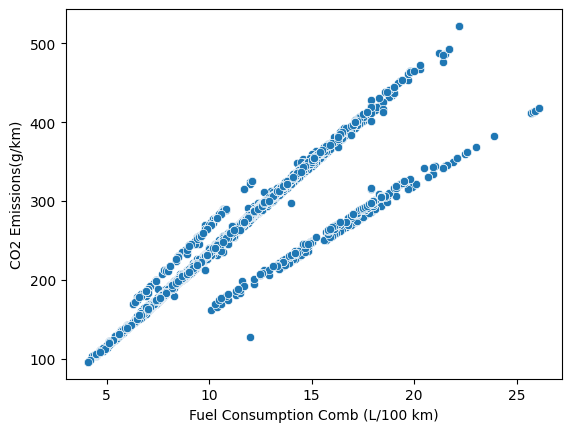

In [29]:
#plot a scatterplot to visualize relationship between fuel consumption and co2 emissions
sns.scatterplot(data = cars, x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)");

Now, we can clearly see that the higher the fuel consumption, the higher the CO2 emission. However, there are different fuel types. Let's see how these different fuel types and their consumptions compare.

## 8. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  

In [30]:
#average fuel consumption

#for regular gasoline(Fuel Type = X)
regular = cars['Fuel Consumption Comb (L/100 km)'][cars["Fuel Type"]=="X"]
np.mean(regular)

10.084575199340117

In [31]:
#for premium gasoline(Z)
premium = cars['Fuel Consumption Comb (L/100 km)'][cars["Fuel Type"]=="Z"] 
np.mean(premium)

11.422767020612117

In [32]:
#for ethanol(E)
ethanol = cars['Fuel Consumption Comb (L/100 km)'][cars["Fuel Type"]=="E"]
np.mean(ethanol)

16.861351351351352

In [33]:
#for diesel(D)
diesel = cars['Fuel Consumption Comb (L/100 km)'][cars["Fuel Type"]=="D"]
np.mean(diesel)

8.835428571428572

Notice that the average fuel consumption for vehicles using ethanol is higher(16.861) than others and that for diesel being the lowest(8.835). 


Let's see how this compares to emission for each fuel type.

## **9. What is the average CO2 emission for each fuel type?**

In [33]:
#roup the cars dataframe by fuel type and finf the mean co2 emissions in ascending order
cars.groupby("Fuel Type")["CO2 Emissions(g/km)",""].mean().sort_values()

Fuel Type
N    213.000000
X    235.119329
D    237.548571
Z    266.043410
E    275.091892
Name: CO2 Emissions(g/km), dtype: float64

Fuel Z and E each have a higher average CO2 emission than that of all vehicles. Fuel D, X and N have the lowest emissions.

Now, let's compare the relationship between fuel consumption and emissions for each fuel type.

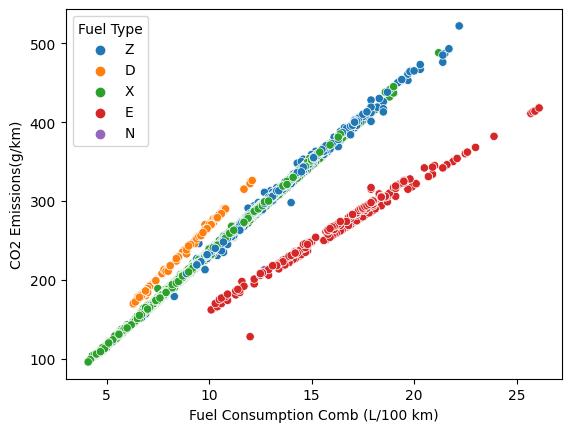

In [36]:
#plot a scatterplot showing relationship between fuel consumption and co2 emissions for each fuel type
sns.scatterplot(data = cars, x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)", hue = "Fuel Type");

The slope for all fuel types are quite similar, however, that of Fuel E(Ethanol) shows higher fuel consumption to emission ratio. Fuel X recorded the lowest emissions.

Finally, how do cylinders fit into this?

## **10. Which vehicles have higher CO2 emissions - those with more cylinders or those with less cylinders?**

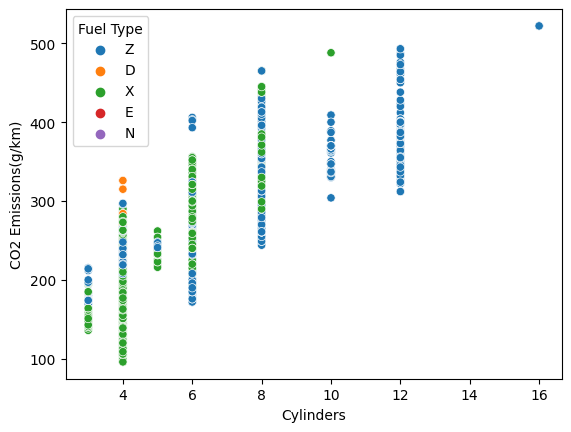

In [35]:
#plot a scatterplot showing the relationship between cylinders and co2 emissions for each fuel type
sns.scatterplot(data = cars, x = "Cylinders", y = "CO2 Emissions(g/km)", hue = "Fuel Type");

Vehicles that use Fuel X with 8 or less cylinders are associated with lower CO2 emissions. Vehicles that use Fuel D only have four cylinders. Even, considering other fuels, one can say that lesser cylinders for vehicles is better for lower emissions.

## **Conclusion**
From the insights generated above, these are my recommendations:
1. Vehicles with smaller engine sizes tend to have lower CO2 emission.
2. Ford cars are more common, however Bugatti Chiron contribute the highest to CO2 emissions.
3. Bigger vehicles, and thus vehucles with larger engine szes have higher emissions.
4. The higher the fuel consumption, the higher the emission.
5. For the same fuel consumption, diesel cars emit the most CO2 and ethanol vehicles emit the least. However, vehicles using regualar gasoline showed a wider range of emissions and the lowest emission recorded.
6. Irregardless of fuel type, vehicles with lesser cylinders tend to have lower emissions.

## 2️⃣ SQL - Understanding the bicycle market <a id="SQL"></a>

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

### Viewing All Tables

In [ ]:
SELECT * 
FROM products;

product_id                          product_name  brand_id  category_id  \
0             1                       Trek 820 - 2016         9            6   
1             2    Ritchey Timberwolf Frameset - 2016         5            6   
2             3       Surly Wednesday Frameset - 2016         8            6   
3             4              Trek Fuel EX 8 29 - 2016         9            6   
4             5          Heller Shagamaw Frame - 2016         3            6   
..          ...                                   ...       ...          ...   
316         317          Trek Checkpoint ALR 5 - 2019         9            7   
317         318  Trek Checkpoint ALR 5 Women's - 2019         9            7   
318         319   Trek Checkpoint SL 5 Women's - 2019         9            7   
319         320           Trek Checkpoint SL 6 - 2019         9            7   
320         321   Trek Checkpoint ALR Frameset - 2019         9            7   

     model_year  list_price  
0          2016      379.99  
1          2016      749.99  
2          2016      999.99  
3          2016     2899.99  
4          2016     1320.99  
..          ...         ...  
316        2019     1999.99  
317        2019     1999.99  
318        2019     2799.99  
319        2019     3799.99  
320        2019     3199.99  

[321 rows x 6 columns]

In [ ]:
SELECT * FROM brands;

brand_id    brand_name
0         1       Electra
1         2          Haro
2         3        Heller
3         4   Pure Cycles
4         5       Ritchey
5         6       Strider
6         7  Sun Bicycles
7         8         Surly
8         9          Trek

In [ ]:
SELECT * FROM categories

category_id        category_name
0            1    Children Bicycles
1            2     Comfort Bicycles
2            3    Cruisers Bicycles
3            4  Cyclocross Bicycles
4            5       Electric Bikes
5            6       Mountain Bikes
6            7           Road Bikes

## 💪 Challenge II
To help my team leader understand my company's products, the following questions will be put forth:

1. What is the most expensive item my company sells? The least expensive?
2. How many different products of each category does my company sell?
3. What are the top three categories with the highest average list price? 
4. What are the top three brands with highest number of products, minimum and average list price?

## **1. What is the most expensive item my company sells? The least expensive?**

In [1]:
SELECT * 
FROM products
WHERE list_price = (SELECT MAX(list_price) FROM products);


product_id                   product_name  ...  model_year  list_price
0         155  Trek Domane SLR 9 Disc - 2018  ...        2018    11999.99

[1 rows x 6 columns]

The most expensive item is the **Trek Domane SLR 9 Disc - 2018** with the price 11999.99.

In [46]:
SELECT * 
FROM products
WHERE list_price = (SELECT MIN(list_price) FROM products);

product_id                            product_name  ...  model_year  list_price
0         263  Strider Classic 12 Balance Bike - 2018  ...        2018       89.99

[1 rows x 6 columns]

The least expensive is the **Strider Classic 12 Balance Bike**, also 2018 model with price - 89.99.

## **2. How many different products of each category does my company sell?**

In [51]:
SELECT category_id, COUNT(product_name) AS product_count
FROM products
GROUP BY category_id


category_id  product_count
0            1             59
1            2             30
2            3             78
3            4             10
4            5             24
5            6             60
6            7             60

The company sells more Cruiser Bicycles(Category 3) than other categories with Cyclocross Bicycles having the least sales. Could this be as a result of price? Let's see how the price of the products for each category is distributed.

## **3. What are the top three categories with the highest average list price?**


In [6]:
SELECT category_id, AVG(list_price) AS avg_list_price
FROM products
GROUP BY category_id
ORDER BY avg_list_price DESC

category_id  avg_list_price
0            5     3281.656666
1            7     3175.357333
2            4     2542.793000
3            6     1649.757333
4            3      730.412307
5            2      682.123333
6            1      287.786610

The top three categories with the highest avergae list price are:
-  Category 5
-  Category 7
-  Category 4
To better understand the effect of price, let's compute the minimum for each category and see how this compares to the product count.

In [5]:
SELECT category_id, AVG(list_price) AS avg_list_price, MIN(list_price) AS min_list_price
FROM products
GROUP BY category_id

category_id  avg_list_price  min_list_price
0            1      287.786610           89.99
1            2      682.123333          416.99
2            3      730.412307          250.99
3            4     2542.793000         1549.00
4            5     3281.656666         1559.99
5            6     1649.757333          379.99
6            7     3175.357333          749.99

From the table above, one can see that the least price for a product in category 3 is considerably smaller than the least price for a product in category 4. Even the average prices for category 3 products are smaller than that for category 4. 

The categories with the highest average list price are also the same categories the highest minimum list price. These are Categories 5, 7 and 4. Going back to the product count, you'll notice that Categories 4 and 5 also have the lowest count of products. This goes to prove that the higher the price, the lower the demand and vice versa.

Moving over to the different brands...


## **4. What are the top three brands with highest number of products, minimum and average list price?**

In [8]:
SELECT brand_id, COUNT(product_name) AS product_count, AVG(list_price) AS avg_list_price, MIN(list_price) AS min_list_price
FROM products
GROUP BY brand_id

brand_id  product_count  avg_list_price  min_list_price
0         1            118      761.006186          269.99
1         2             10      621.990000          209.99
2         3              3     2172.996666         1320.99
3         4              3      442.333333          429.00
4         5              1      749.990000          749.99
5         6              3      209.990000           89.99
6         7             23      524.468260          109.99
7         8             25     1331.753600          469.99
8         9            135     2500.064074          149.99

Brand 9(Trek) has the most products sold. Despite having the highest average list price, it also has one of the smallest list price when compared to other products(149.99). This wide range of price for Trek products can explain why it possesses the higher number of products for sale. This is because there is a product for every budget. However, further analysis would need to be done to reach any final conclusions.

## **Insights**
From my analysis, i discovered the following:
1. The most expensive item is the Trek Domane SLR 9 Disc - 2018 with the price 11999.99.
2. The least expensive item is the Strider Classic 12 Balance Bike, also 2018 model with price - 89.99.
3. The company sells Cruiser Bicycles the most and CycloCross Bicycles the least.
4. CycloCross Bicycles and Electric Bikes are the three most expensive categories on average. This could explain why they are also the categories with the least number of products for sale.
5. Trek products have the widest price range for products and also the highest number of products for sale. Thus, one can say there is a Trek product for your budget.